In [54]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [55]:
t_balaji = uproot.open("../sync_new.root")["t"]
df_balaji = t_balaji.arrays(library="pd")

In [56]:
t_franny = uproot.open("/home/users/fsetti/HggNanoAnalysis/synch/synch_out.root")["Events"]
df_franny = t_franny.arrays(library="pd")

In [57]:
len(df_franny), len(df_balaji)

(14847, 14847)

In [58]:
df_balaji.groupby("process_id").count()

,phi_tautau_SVFit,eta_bdt_tautau_SVFit,eta_tautau_SVFit,gg_tt_hel_vis,lep12_dR,pt_tautau_SVFit,lep12_deta,MET_dil_dphi,eta_tautau_vis,m_tautau_vis,...,gg_eta,jet2_bTag,lep12_dphi,jet2_id,n_isoTrk,lep1_tightID,n_electrons,n_taus,lep1_eta,lep1_pt
process_id,,,,,,,,,,,,,,,,,,,,,
-1.0,9042,9042,9042,9042,9042,9042,9042,9042,9042,9042,...,9042,9042,9042,9042,9042,9042,9042,9042,9042,9042
0.0,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
3.0,2687,2687,2687,2687,2687,2687,2687,2687,2687,2687,...,2687,2687,2687,2687,2687,2687,2687,2687,2687,2687
9.0,3098,3098,3098,3098,3098,3098,3098,3098,3098,3098,...,3098,3098,3098,3098,3098,3098,3098,3098,3098,3098


In [59]:
df_franny.groupby("process_id").count()

,year,run,lumiBlock,event,MET_pt,MET_phi,weight,Category,cat1,cat2,...,dR_ggtautau_SVFit,dPhi_tautau_SVFit,dPhi_ggtautau_SVFit,tt_hel,tt_hel_phys,m_tautau_vis,pt_tautau_vis,eta_tautau_vis,eta_tautau_vis_bdt,phi_tautau_vis
process_id,,,,,,,,,,,,,,,,,,,,,
-1,9042,9042,9042,9042,9042,9042,9042,9042,9042,9042,...,9042,9042,9042,9042,9042,9042,9042,9042,9042,9042
0,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
3,2687,2687,2687,2687,2687,2687,2687,2687,2687,2687,...,2687,2687,2687,2687,2687,2687,2687,2687,2687,2687
9,3098,3098,3098,3098,3098,3098,3098,3098,3098,3098,...,3098,3098,3098,3098,3098,3098,3098,3098,3098,3098


In [60]:
df_balaji.loc[df_balaji["process_id"] == 9].groupby("Category").count()["phi_tautau_SVFit"]

Category
1.0      86
2.0      86
3.0      75
4.0      37
5.0      27
6.0      21
7.0     148
8.0    2618
Name: phi_tautau_SVFit, dtype: int64

In [61]:
df_franny.loc[df_franny["process_id"] == 9].groupby("Category").count()["year"]

Category
1      86
2      86
3      75
4      37
5      27
6      21
7     148
8    2618
Name: year, dtype: int64

In [62]:
common_branches = np.intersect1d(t_franny.keys(), t_balaji.keys())

In [63]:
common_branches

array(['Category', 'MET_phi', 'MET_pt', 'dR_ggtautau_SVFit',
       'dR_tautau_SVFit', 'eta_tautau_SVFit', 'eta_tautau_vis', 'g1_eta',
       'g1_eta_bdt', 'g1_idmva', 'g1_phi', 'g1_pixVeto', 'g1_pt',
       'g1_ptmgg', 'g2_eta', 'g2_eta_bdt', 'g2_idmva', 'g2_phi',
       'g2_pixVeto', 'g2_pt', 'g2_ptmgg', 'gg_dPhi', 'gg_dR', 'gg_eta',
       'gg_phi', 'gg_pt', 'gg_ptmgg', 'gg_tt_CS', 'gg_tt_hel',
       'jet1_bTag', 'jet1_eta', 'jet1_eta_bdt', 'jet1_id', 'jet1_pt',
       'jet2_bTag', 'jet2_eta', 'jet2_eta_bdt', 'jet2_id', 'jet2_pt',
       'lep12_deta', 'lep12_dphi', 'lep1_charge', 'lep1_eta',
       'lep1_eta_bdt', 'lep1_id_vs_e', 'lep1_id_vs_m', 'lep1_pdgID',
       'lep1_phi', 'lep1_pt', 'lep1_tightID', 'lep2_charge', 'lep2_eta',
       'lep2_eta_bdt', 'lep2_id_vs_e', 'lep2_id_vs_m', 'lep2_pdgID',
       'lep2_phi', 'lep2_pt', 'lep2_tightID', 'm_tautau_SVFit',
       'm_tautau_vis', 'mgg', 'n_bjets', 'n_electrons', 'n_jets',
       'n_muons', 'n_taus', 'phi_tautau_SVFit', 'phi_tau

In [64]:
process_ids = {}
process_ids["Data"] = 0
process_ids["HH_ggTauTau"] = -1
process_ids["HH_ggZZ"] = -2
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4
process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [65]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


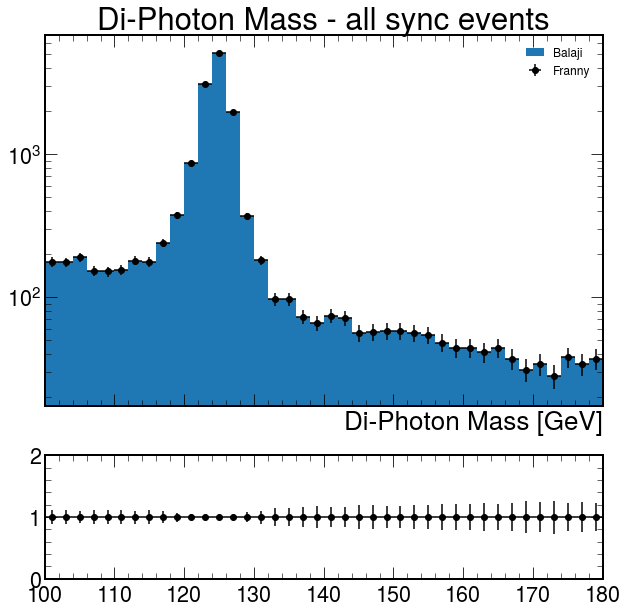

In [66]:
mgg_binning = "40,100,180" # ROOT convention


balaji_toFill = df_balaji["mgg"] # select by process, then select the quantity
franny_toFill = df_franny["mgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon Mass [GeV]")
plt.title("Di-Photon Mass - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("mgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


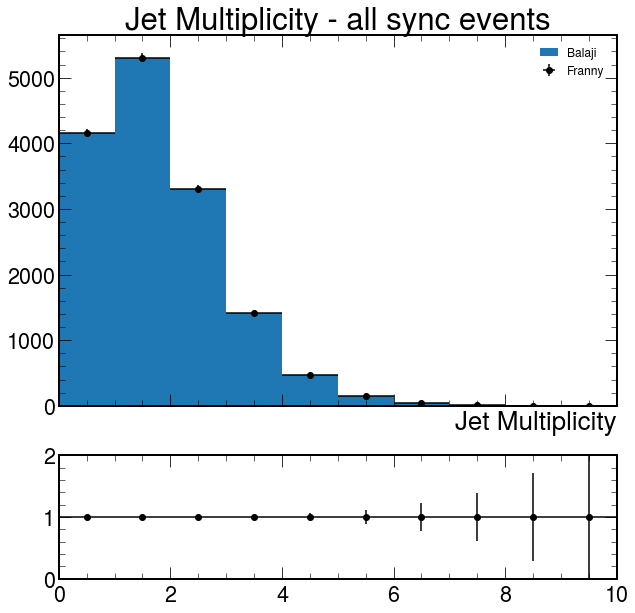

In [67]:
mgg_binning = "10,0,10" # ROOT convention


balaji_toFill = df_balaji["n_jets"] # select by process, then select the quantity
franny_toFill = df_franny["n_jets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Jet Multiplicity")
plt.title("Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_jet.pdf")

### Concerning distribution!!

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


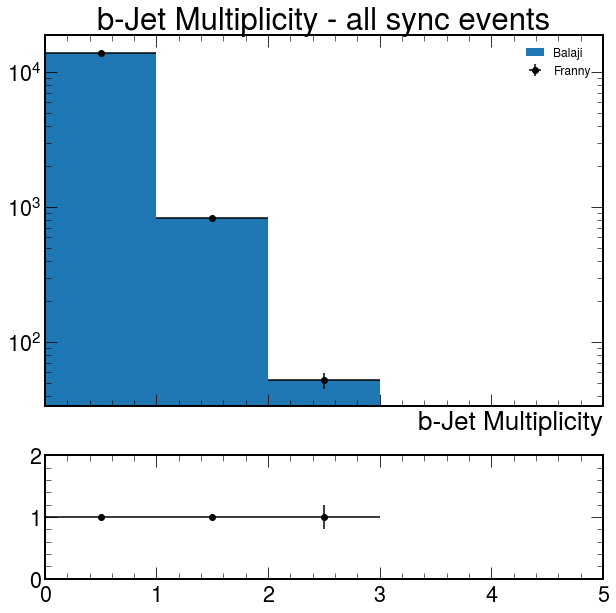

In [68]:
mgg_binning = "5,0,5" # ROOT convention


balaji_toFill = df_balaji["n_bjets"] # select by process, then select the quantity
franny_toFill = df_franny["n_bjets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("b-Jet Multiplicity")
plt.title("b-Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_bjet.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


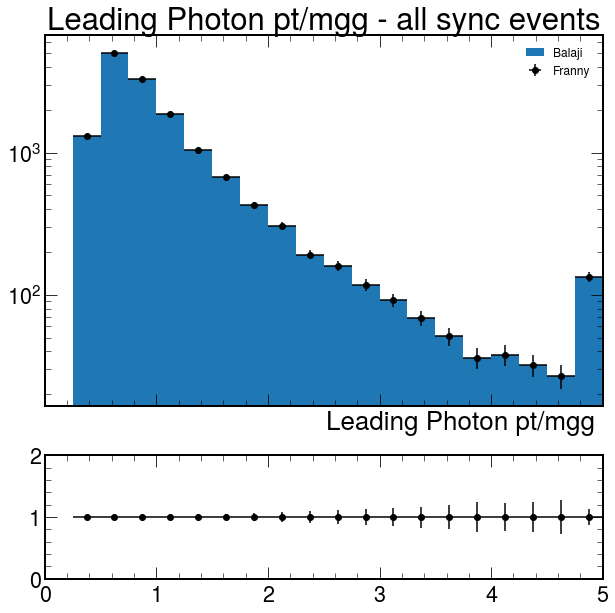

In [69]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g1_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g1_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon pt/mgg ")
plt.title("Leading Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g1_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


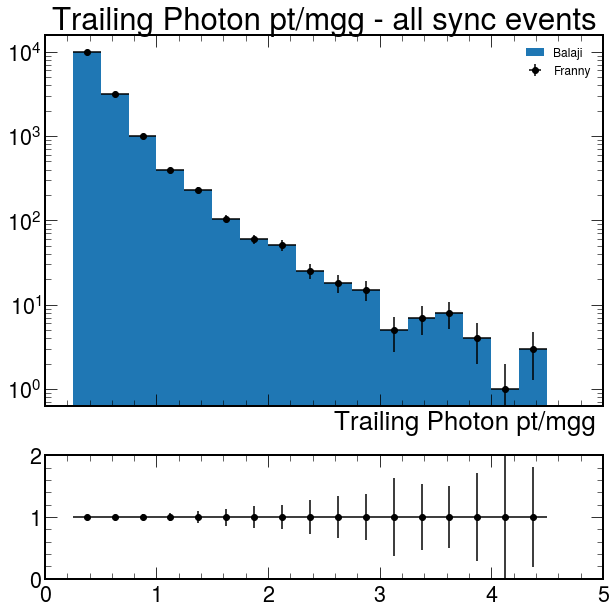

In [70]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g2_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g2_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon pt/mgg ")
plt.title("Trailing Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g2_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


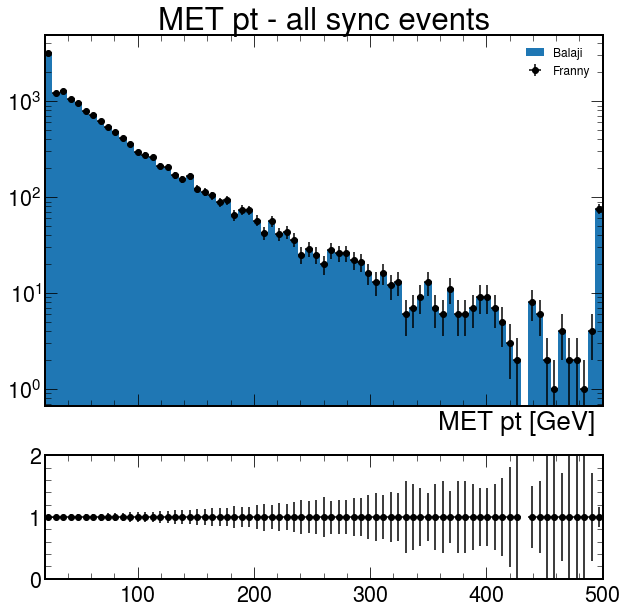

In [71]:
mgg_binning = "75,20,500" # ROOT convention


balaji_toFill = df_balaji["MET_pt"] # select by process, then select the quantity
franny_toFill = df_franny["MET_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET pt [GeV] ")
plt.title("MET pt - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("MET_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


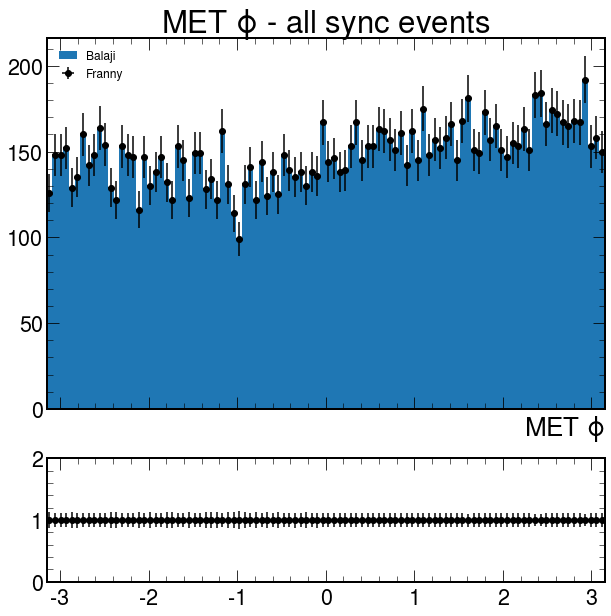

In [72]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["MET_phi"] # select by process, then select the quantity
franny_toFill = df_franny["MET_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET $\phi$")
plt.title("MET $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("MET_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


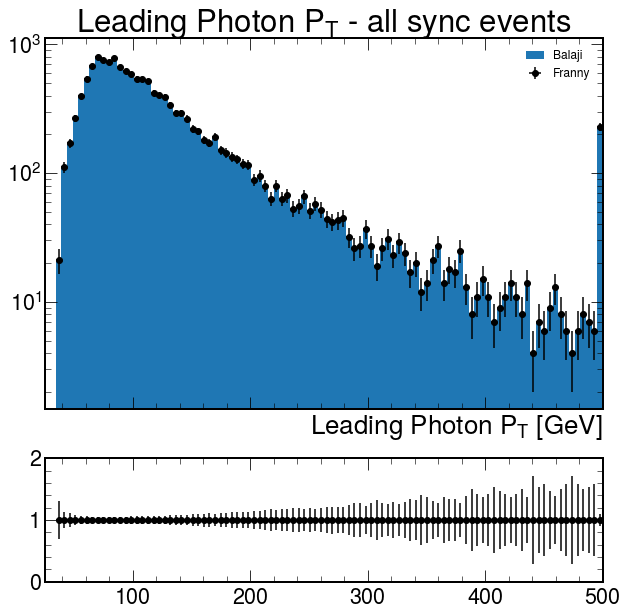

In [73]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g1_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $P_T$ [GeV]")
plt.title("Leading Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


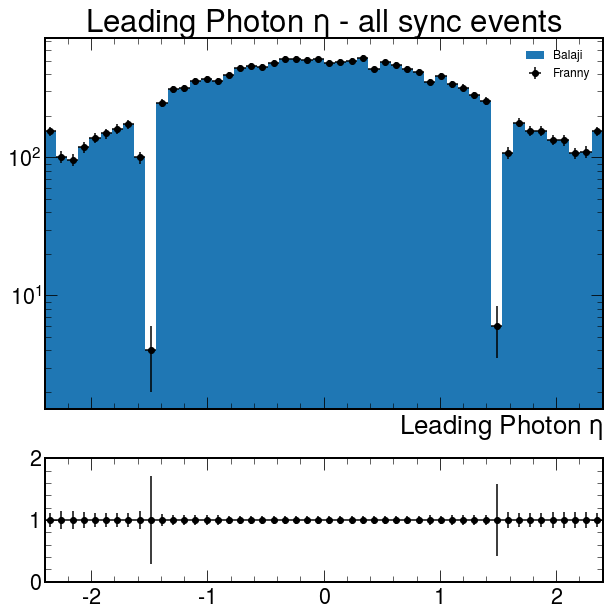

In [74]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g1_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $\eta$")
plt.title("Leading Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


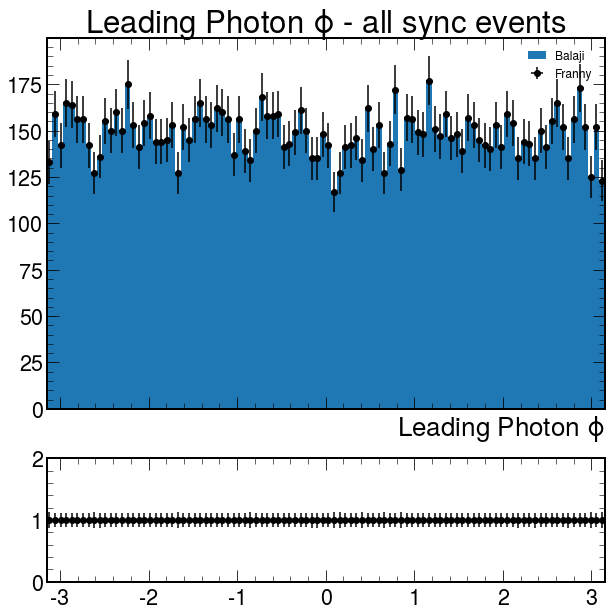

In [75]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g1_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon $\phi$")
plt.title("Leading Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


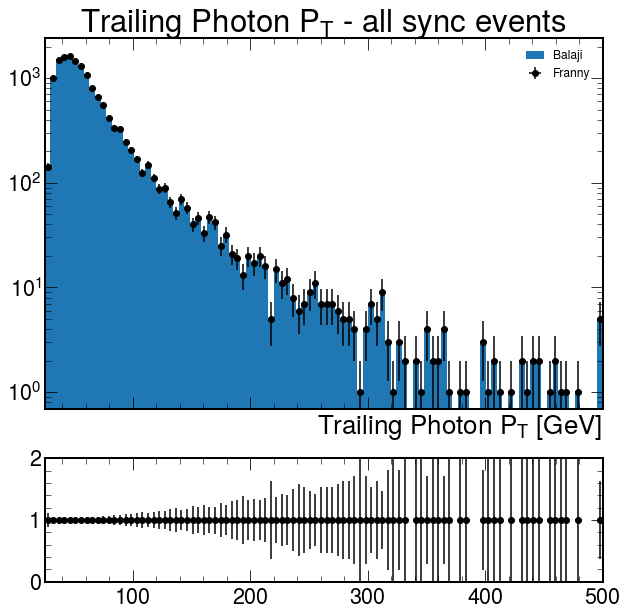

In [76]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g2_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $P_T$ [GeV]")
plt.title("Trailing Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


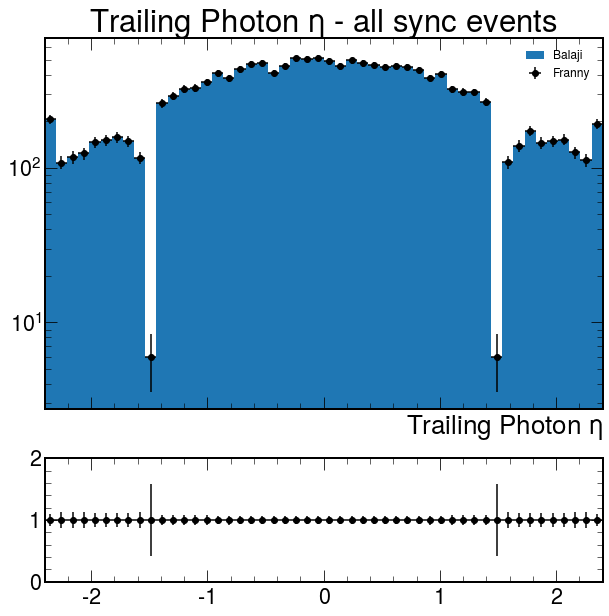

In [77]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g2_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $\eta$")
plt.title("Trailing Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


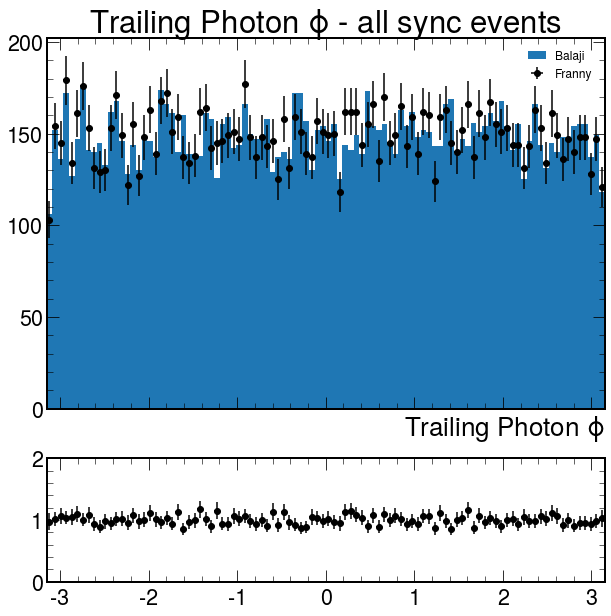

In [78]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g2_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon $\phi$")
plt.title("Trailing Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


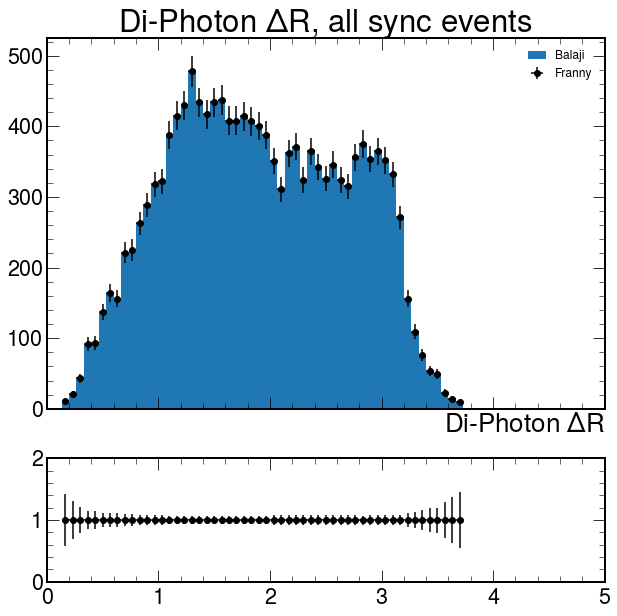

In [79]:
mgg_binning = "75,0,5" # ROOT convention


balaji_toFill = df_balaji["gg_dR"] # select by process, then select the quantity
franny_toFill = df_franny["gg_dR"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\Delta$R")
plt.title("Di-Photon $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_dR.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


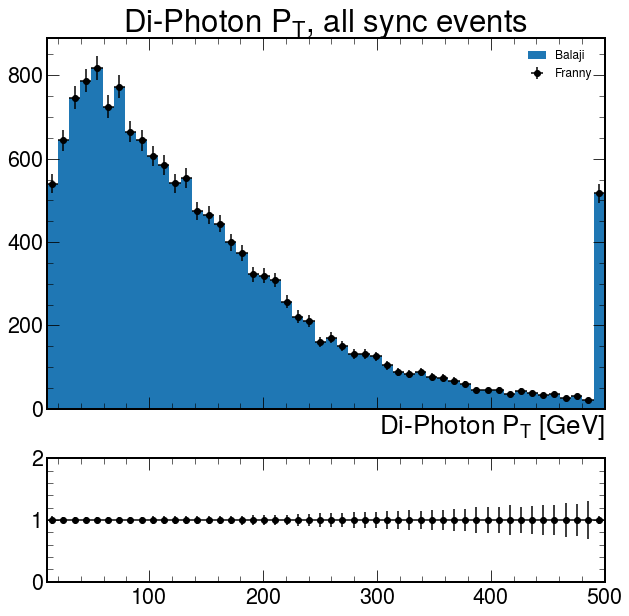

In [80]:
mgg_binning = "50,10,500" # ROOT convention


balaji_toFill = df_balaji["gg_pt"] # select by process, then select the quantity
franny_toFill = df_franny["gg_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $P_T$ [GeV]")
plt.title("Di-Photon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


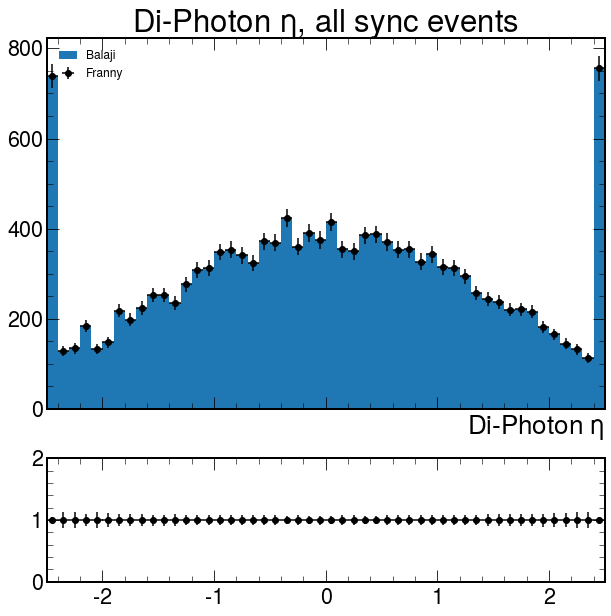

In [81]:
mgg_binning = "50,-2.5,2.5" # ROOT convention


balaji_toFill = df_balaji["gg_eta"] # select by process, then select the quantity
franny_toFill = df_franny["gg_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\eta$")
plt.title("Di-Photon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


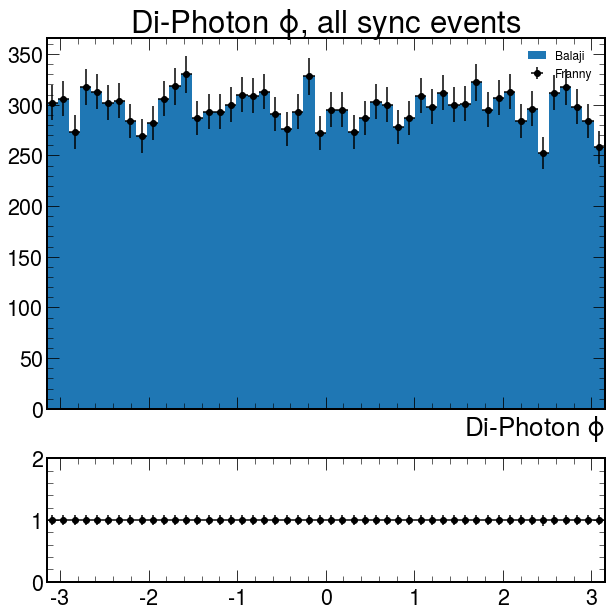

In [82]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji["gg_phi"] # select by process, then select the quantity
franny_toFill = df_franny["gg_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\phi$")
plt.title("Di-Photon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


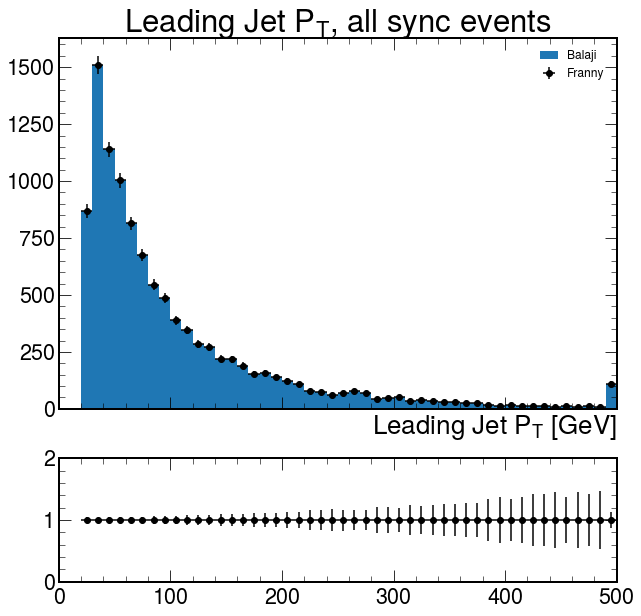

In [83]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $P_T$ [GeV]")
plt.title("Leading Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


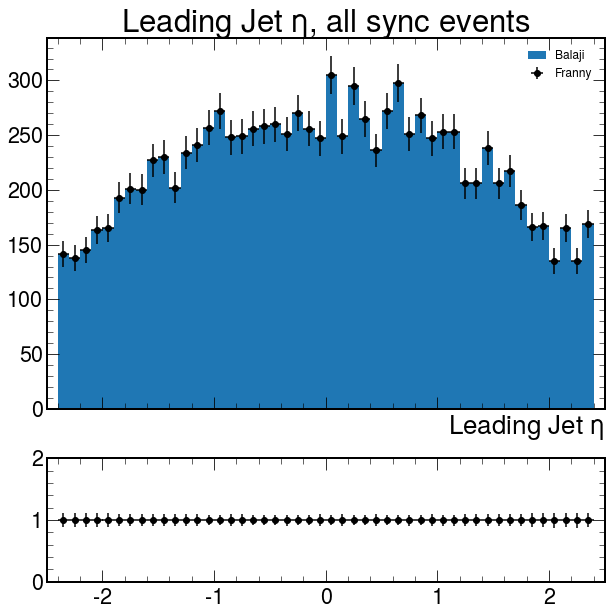

In [84]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $\eta$")
plt.title("Leading Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


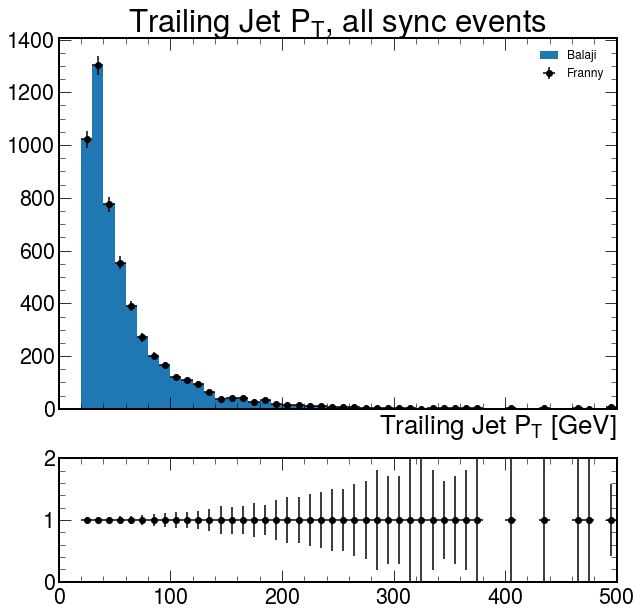

In [85]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $P_T$ [GeV]")
plt.title("Trailing Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


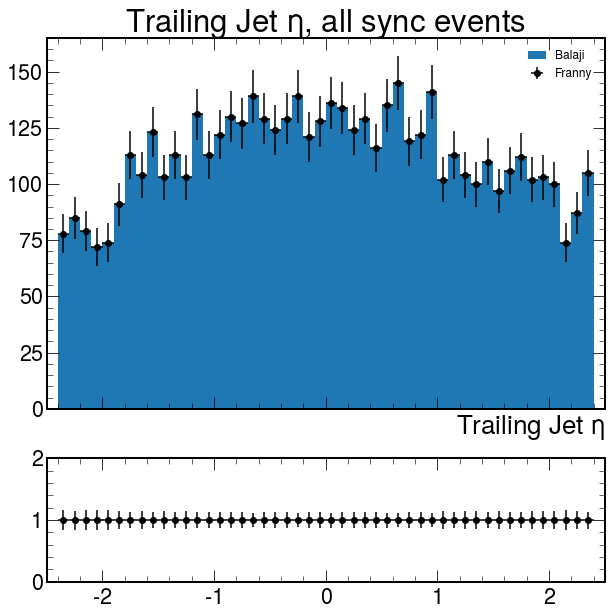

In [86]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $\eta$")
plt.title("Trailing Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_eta.pdf")

In [87]:
abs(df_franny["lep1_pdgID"]).unique()

array([15., 13., 11.], dtype=float32)

In [88]:
df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13]

,phi_tautau_SVFit,eta_bdt_tautau_SVFit,eta_tautau_SVFit,gg_tt_hel_vis,lep12_dR,pt_tautau_SVFit,lep12_deta,MET_dil_dphi,eta_tautau_vis,m_tautau_vis,...,gg_eta,jet2_bTag,lep12_dphi,jet2_id,n_isoTrk,lep1_tightID,n_electrons,n_taus,lep1_eta,lep1_pt
55,-0.581633,0.440922,0.440922,0.290357,0.499577,81.462852,-0.389771,-2.052870,0.417005,11.859468,...,0.486301,0.005157,0.312500,6.0,0.0,1.0,0.0,0.0,0.246826,28.674923
101,2.910081,1.180787,-1.180787,0.506082,1.583992,79.289383,-0.166870,1.032065,-1.180447,49.889717,...,-1.637396,0.003836,-1.575178,6.0,0.0,1.0,0.0,0.0,-0.986816,37.095844
441,-0.287731,0.380921,0.380921,0.691092,0.157834,57.016335,0.136047,1.208060,0.383734,2.720422,...,1.972053,0.003162,0.080017,6.0,0.0,1.0,1.0,0.0,0.452759,16.667614
852,0.150794,0.623755,-0.623755,0.832437,0.770260,73.751099,-0.769592,0.255370,-0.676491,17.656752,...,-1.719063,0.024078,0.032074,6.0,0.0,1.0,0.0,1.0,-1.097168,18.137554
955,-0.587696,0.495691,-0.495691,0.539209,2.582384,229.512009,2.444092,3.116112,-0.580429,113.602180,...,-0.560633,-999.000000,-0.833740,-999.0,0.0,1.0,0.0,1.0,1.790527,5.749246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14806,1.895961,-0.103957,-0.103957,0.275391,1.263779,210.128922,0.450745,-0.924981,-0.200207,35.184547,...,0.357282,-999.000000,1.180664,-999.0,0.0,0.0,0.0,1.0,0.240814,5.129491
14807,2.734726,0.547043,0.547043,0.386079,1.086269,232.395432,-1.077255,0.302476,0.844180,68.508507,...,1.446696,-999.000000,-0.139648,-999.0,0.0,1.0,1.0,0.0,-0.036484,32.828983
14808,-0.942488,-1.685030,1.685030,0.982234,2.451353,108.411301,2.323486,-0.297531,1.367486,71.711060,...,-1.385581,-999.000000,0.781372,-999.0,0.0,1.0,1.0,0.0,1.853760,29.985188
14816,1.111492,0.100263,0.100263,0.615496,2.567523,107.098198,0.672943,1.273026,-0.597921,27.541979,...,0.584349,-999.000000,-2.477765,-999.0,0.0,1.0,1.0,0.0,0.156830,13.001472


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


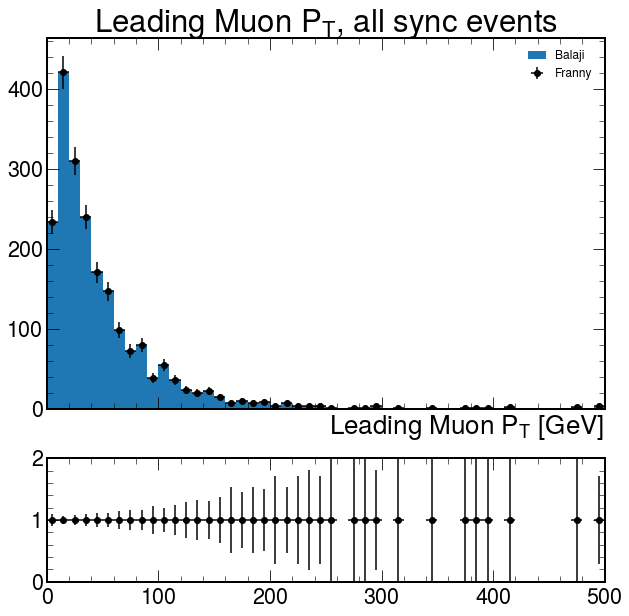

In [89]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $P_T$ [GeV]")
plt.title("Leading Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


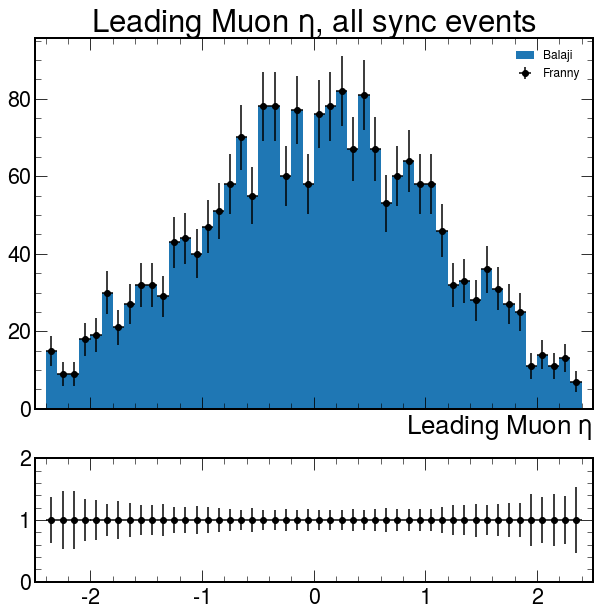

In [90]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\eta$")
plt.title("Leading Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


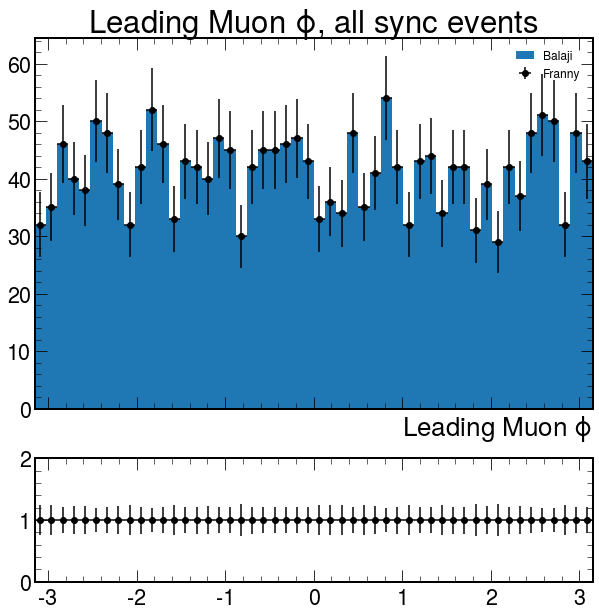

In [91]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgID"]) == 13, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\phi$")
plt.title("Leading Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_phi.pdf")

In [92]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Muon $P_T$ [GeV]")
plt.title("Trailing Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_phi.pdf")

KeyError: 'lep2_pdgId'

In [ ]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\eta$")
plt.title("Trailing Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_pt.pdf")

In [ ]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\phi$")
plt.title("Trailing Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_phi.pdf")

In [ ]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Electron $P_T$ [GeV]")
plt.title("Leading Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_pt.pdf")

In [93]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\eta$")
plt.title("Leading Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_eta.pdf")

KeyError: 'lep1_pdgId'

In [94]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\phi$")
plt.title("Leading Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_phi.pdf")

KeyError: 'lep1_pdgId'

In [95]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Electron $P_T$ [GeV]")
plt.title("Trailing Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_pt.pdf")

KeyError: 'lep2_pdgId'

In [96]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\eta$")
plt.title("Trailing Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_eta.pdf")

KeyError: 'lep2_pdgId'

In [97]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\phi$")
plt.title("Trailing Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_phi.pdf")

KeyError: 'lep2_pdgId'

In [98]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Tau $P_T$ [GeV]")
plt.title("Leading Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_pt.pdf")

KeyError: 'lep1_pdgId'

In [99]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\eta$")
plt.title("Leading Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_eta.pdf")

KeyError: 'lep1_pdgId'

In [100]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\phi$")
plt.title("Leading Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_phi.pdf")

KeyError: 'lep1_pdgId'

In [101]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Tau $P_T$ [GeV]")
plt.title("Trailing Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_pt.pdf")

KeyError: 'lep2_pdgId'

In [102]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\eta$")
plt.title("Trailing Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_eta.pdf")

KeyError: 'lep2_pdgId'

In [103]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\phi$")
plt.title("Trailing Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_phi.pdf")

KeyError: 'lep2_pdgId'

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


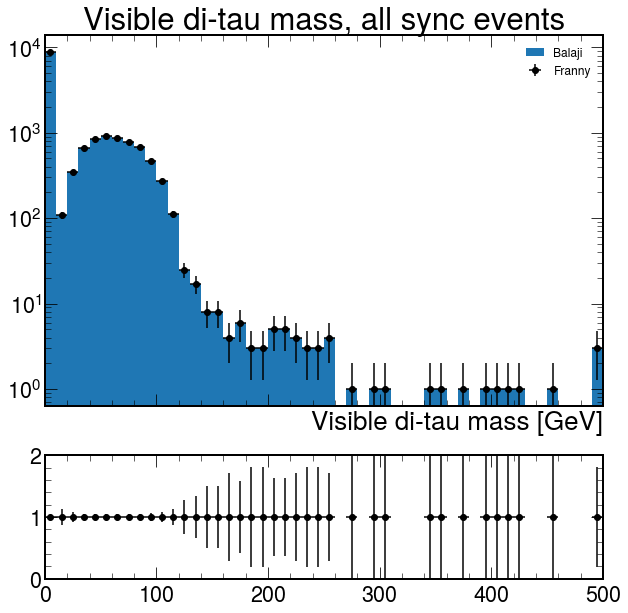

In [104]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji["m_tautau_vis"] # select by process, then select the quantity
franny_toFill = df_franny["m_tautau_vis"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Visible di-tau mass [GeV]")
plt.title("Visible di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_vis.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


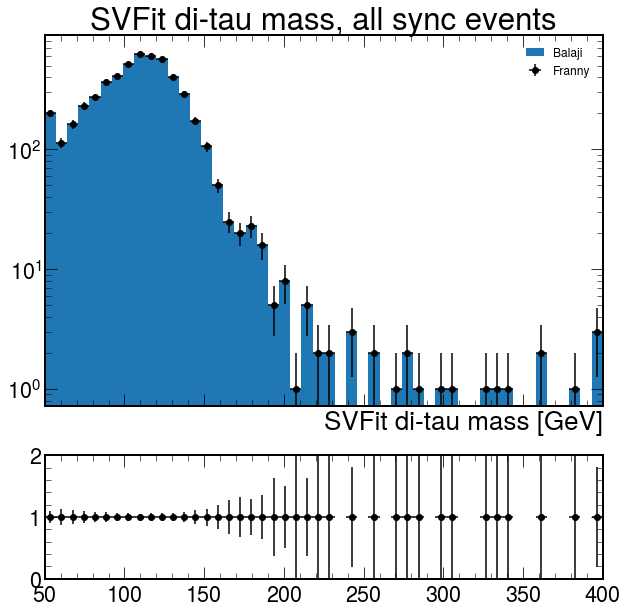

In [105]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "m_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "m_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau mass [GeV]")
plt.title("SVFit di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


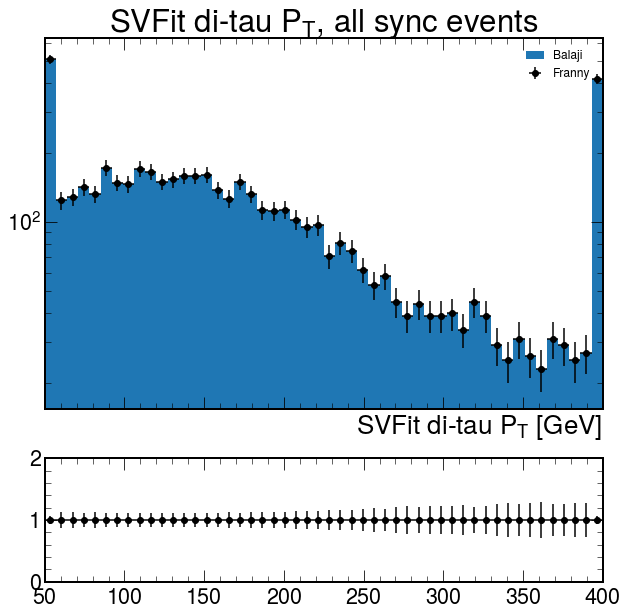

In [106]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "pt_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "pt_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau $P_T$ [GeV]")
plt.title("SVFit di-tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("pt_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


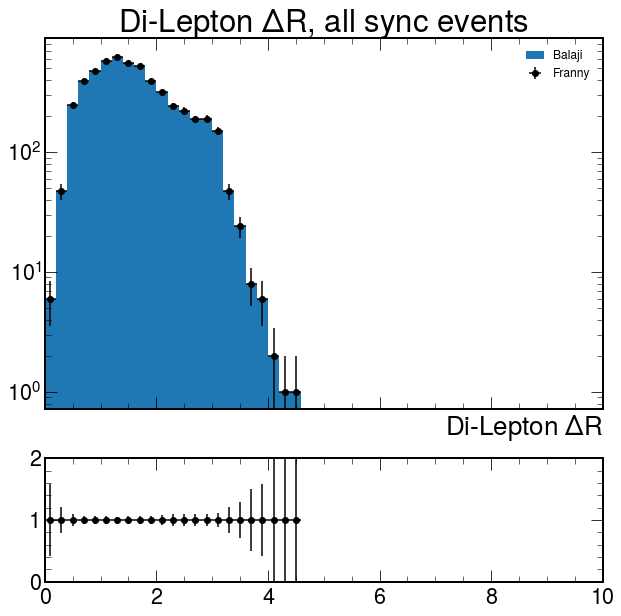

In [107]:
mgg_binning = "50,0,10" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "lep12_dR"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "lep12_dr"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Di-Lepton $\Delta$R")
plt.title("Di-Lepton $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("lep12_dR.pdf")

### The "not-so-nice" ones

In [108]:
df_balaji.columns

Index(['phi_tautau_SVFit', 'eta_bdt_tautau_SVFit', 'eta_tautau_SVFit',
       'gg_tt_hel_vis', 'lep12_dR', 'pt_tautau_SVFit', 'lep12_deta',
       'MET_dil_dphi', 'eta_tautau_vis', 'm_tautau_vis', 'dPhi_MET_tau1',
       'tt_hel', 'lep2_id_vs_j', 'Category', 'lep2_charge', 'Max_bTag',
       'lep2_pdgID', 'lep2_id_vs_m', 'lep2_mass', 'lep2_tightID',
       'lep1_id_vs_j', 'lep1_mass', 'lep1_eta_bdt', 'gg_dR', 'pt_tautau_vis',
       'lep2_eta_bdt', 'gg_phi', 'g2_pixVeto', 'lep1_id_vs_e', 'g1_eta_bdt',
       'weight', 'MET_gg_dphi', 'gg_dPhi', 'g2_ptmgg', 'gg_tt_CS', 'lep2_phi',
       'g1_phi', 'phi_tautau_vis', 'lep2_eta', 'g1_pt', 'process_id',
       'gg_tt_hel', 'gg_pt', 'year', 'lep1_pdgID', 'g2_phi', 'g1_eta',
       'lep2_id_vs_e', 'g2_pt', 'dR_ggtautau_SVFit', 'g2_eta', 'g1_idmva',
       'gg_ptmgg', 'eta_bdt_tautau_vis', 'g1_ptmgg', 'g2_eta_bdt', 'mgg',
       'm_tautau_SVFit', 'g2_idmva', 'g1_pixVeto', 'gg_cosTheta_helicity',
       'lep1_phi', 'jet2_eta', 'gg_cosTheta_helic

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


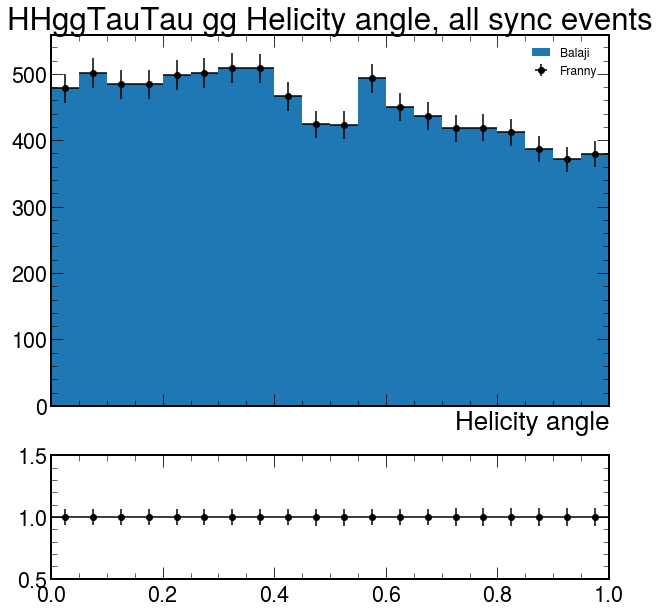

In [109]:
mgg_binning = "20,0.0,1.0" # ROOT convention


balaji_toFill = abs(df_balaji.loc[df_balaji["process_id"] == -1, "gg_cosTheta_helicity_flashgg"]) # select by process, then select the quantity
franny_toFill = abs(df_franny.loc[df_franny["process_id"] == -1, "gg_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("HHggTauTau gg Helicity angle, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_helicity_HH.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


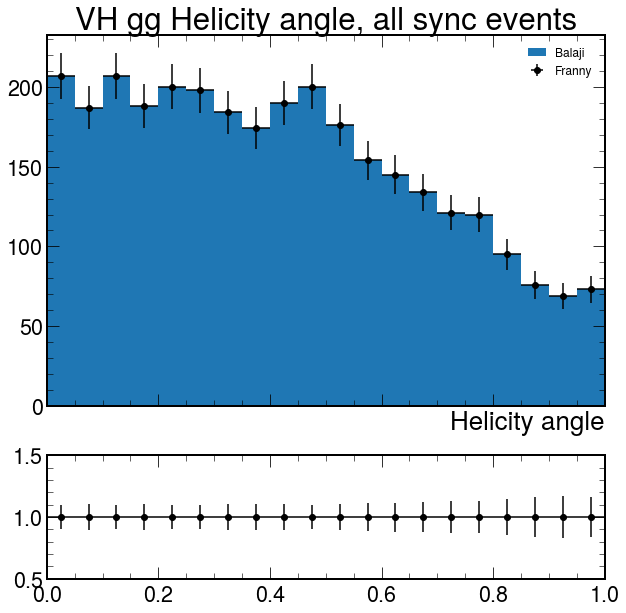

In [110]:
mgg_binning = "20,0,1.0" # ROOT convention


balaji_toFill = abs(df_balaji.loc[df_balaji["process_id"] == 9, "gg_cosTheta_helicity_flashgg"]) # select by process, then select the quantity
franny_toFill = abs(df_franny.loc[df_franny["process_id"] == 9, "gg_hel"])

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0.5,1.5])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("VH gg Helicity angle, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_helicity_VH.pdf")